## ASSIGNMENT 3 ##

1. Download the dataset: Dataset
2. Load the dataset into the tool.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [120]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [99]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [100]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [101]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

3. Visualization

***Univariate analysis***

<AxesSubplot: ylabel='species'>

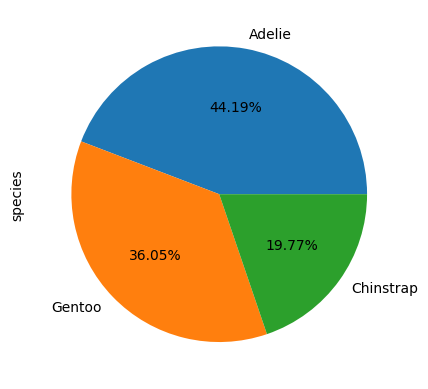

In [10]:
Species=df.species.value_counts()
Species.plot(kind='pie',autopct="%.2f%%")

<AxesSubplot: ylabel='island'>

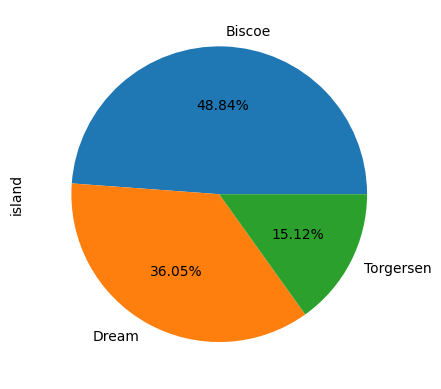

In [12]:
Island=df.island.value_counts()
Island.plot(kind='pie',autopct="%.2f%%")

Text(0.5, 1.0, 'Flipper Length')

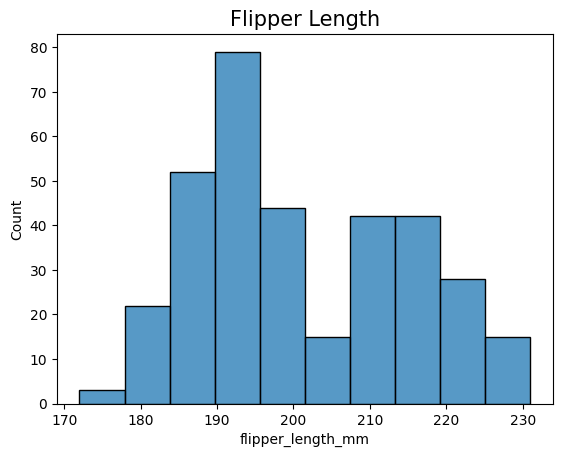

In [59]:
sns.histplot(x ="flipper_length_mm", data=df)
plt.title("Flipper Length", size=15)

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

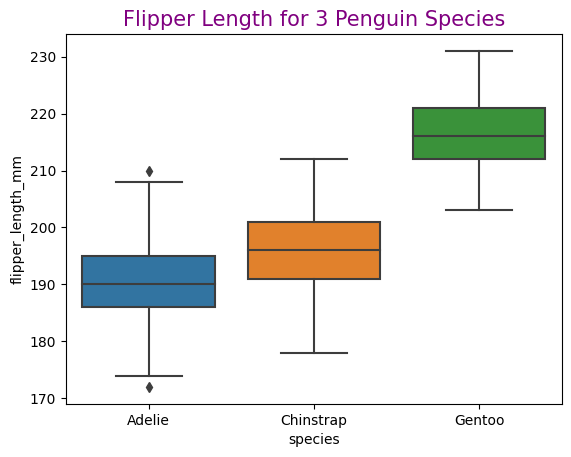

In [58]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =df)
plt.title("Flipper Length for 3 Penguin Species", size=15, color="purple")

***Bivariate analysis***

Text(0.5, 1.0, 'Culmenl Length vs Culmen Depth')

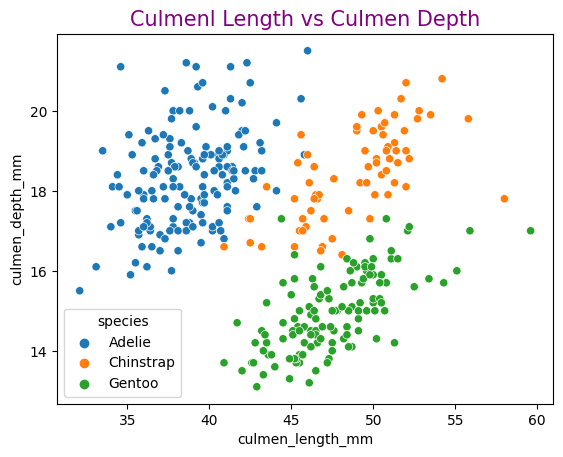

In [54]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=df, hue="species")
plt.title("Culmenl Length vs Culmen Depth", size=15, color="purple")

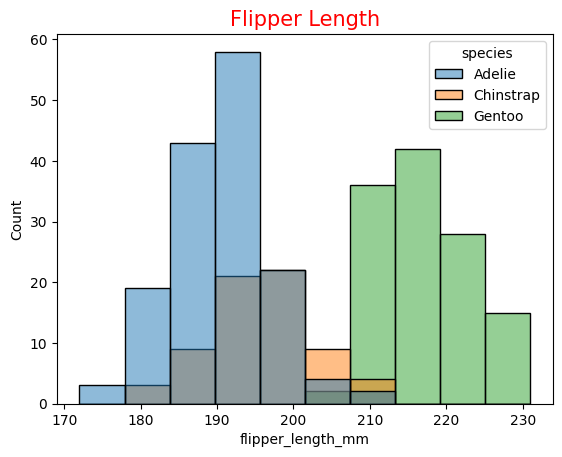

In [56]:
sns.histplot(x="flipper_length_mm", data=df, hue="species")  
plt.title("Flipper Length", size=15, color="red")
plt.show()

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

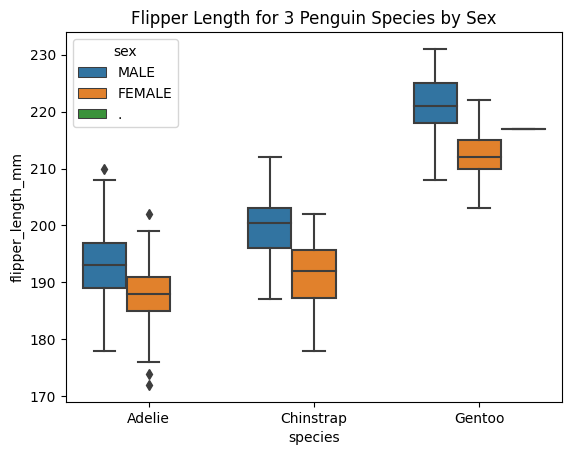

In [61]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =df, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex")

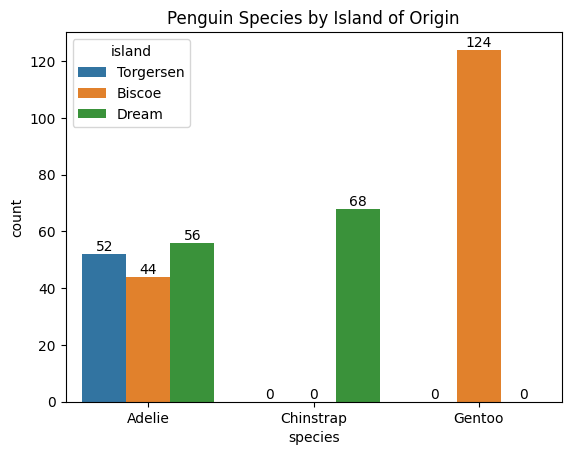

In [112]:
ax = sns.countplot(data=df, x="species", hue="island")
ax.set(title="Penguin Species by Island of Origin")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

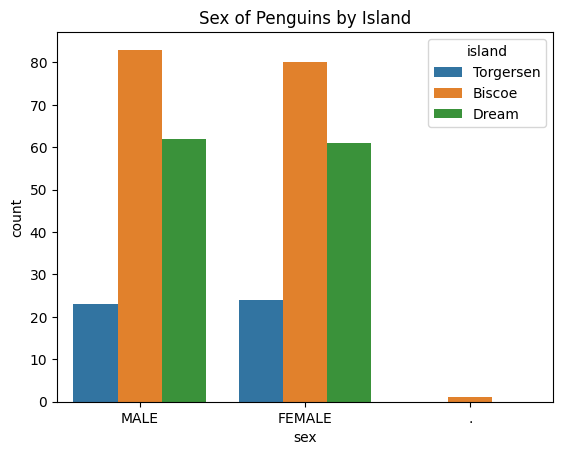

In [114]:
ax = sns.countplot(data=df, x="sex", hue="island")
ax.set(title="Sex of Penguins by Island")
plt.show()

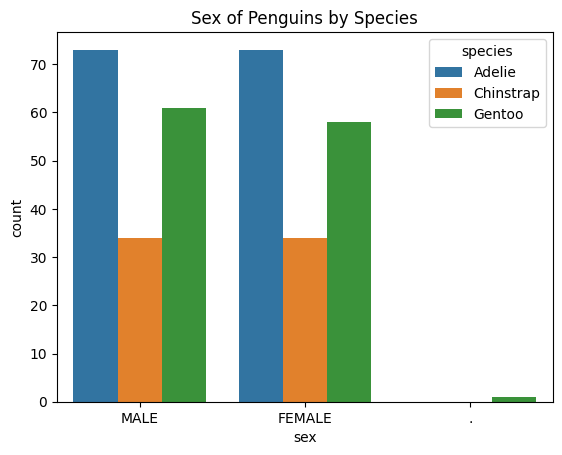

In [116]:
ax = sns.countplot(data=df, x="sex", hue="species")
ax.set(title="Sex of Penguins by Species")
plt.show()

***Multivariate analysis***

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

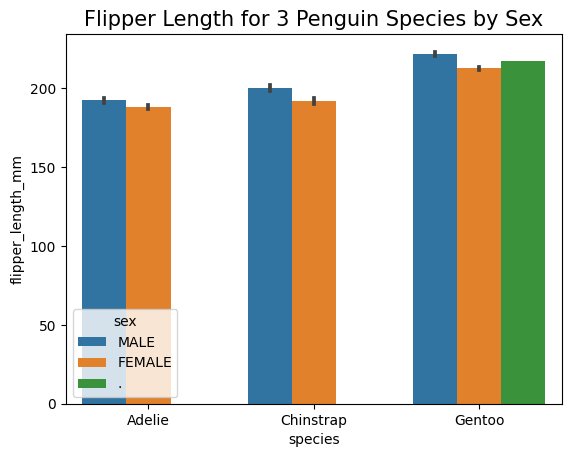

In [55]:
sns.barplot(x = "species", y = "flipper_length_mm", data =df, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=15)

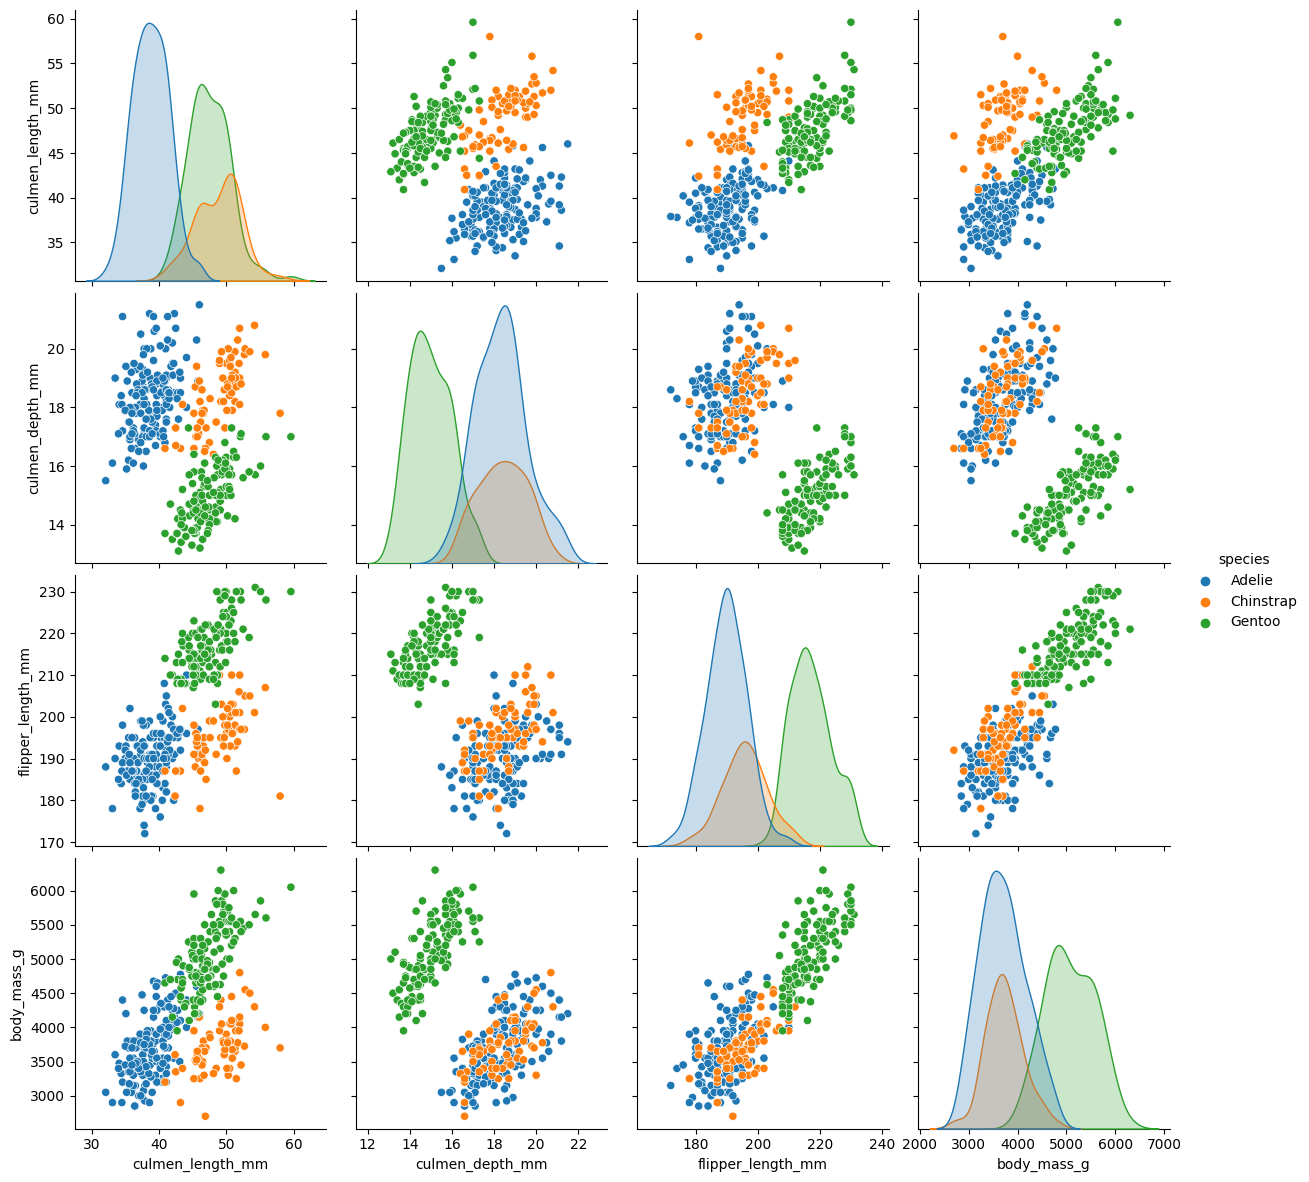

In [66]:
sns.pairplot(df, hue = "species", height=3)

C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_3524\3803735512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<AxesSubplot: >

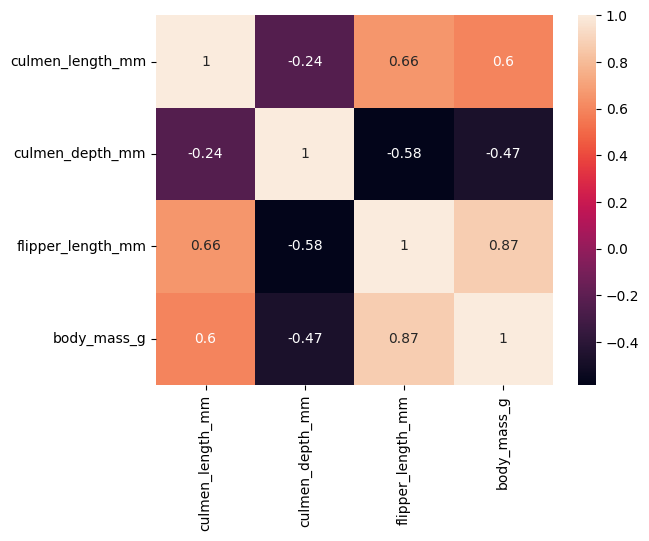

In [57]:
sns.heatmap(data=df.corr(),annot=True)

4. Perform descriptive statistics on the dataset.

In [68]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


5. Check for Missing values and deal with them.

In [69]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [70]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [121]:
mode_value = df['sex'].mode()[0]
mode_value


'MALE'

In [122]:

df['sex'] = df['sex'].replace('.', mode_value)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(), inplace=True)

In [123]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [96]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [97]:
df.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

6. Find the outliers and replace them

In [102]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

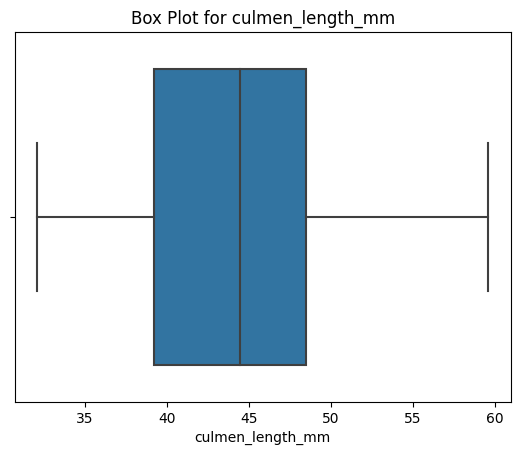

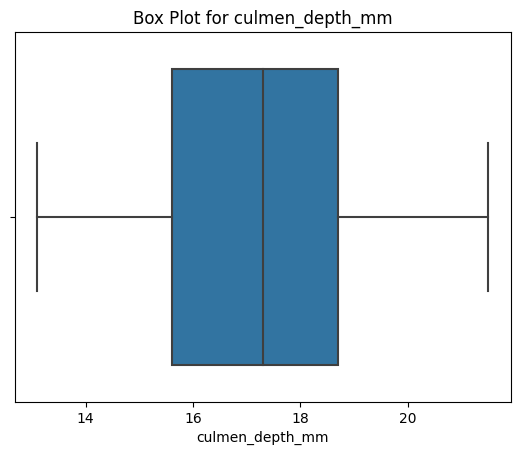

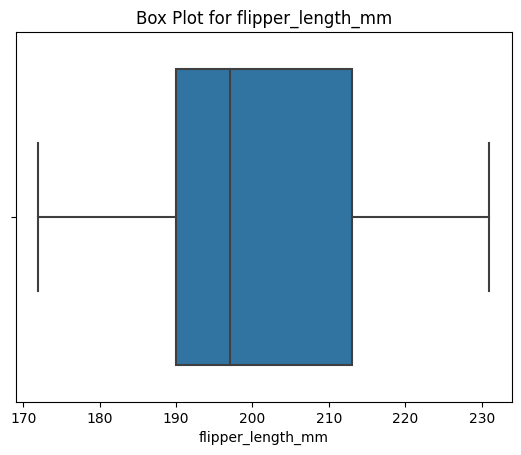

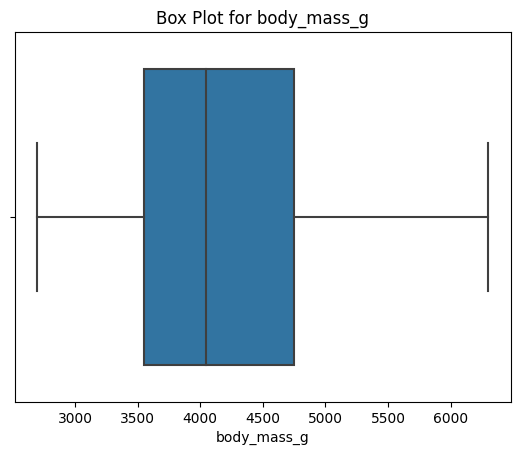

In [117]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

8. Check for Categorical columns and perform encoding.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [129]:
le = LabelEncoder()
en_col = ['species','island','sex']
for i in en_col:
    df[i] = le.fit_transform(df[i])


In [130]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


7.Check the correlation of independent variables with the target

In [132]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728706,-0.741282,0.850819,0.747547,0.010240
island,-0.635659,1.000000,-0.351189,0.567701,-0.562957,-0.558500,0.002893
culmen_length_mm,0.728706,-0.351189,1.000000,-0.235000,0.655858,0.594925,0.322871
culmen_depth_mm,-0.741282,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.354791
flipper_length_mm,0.850819,-0.562957,0.655858,-0.583832,1.000000,0.871221,0.241941
body_mass_g,0.747547,-0.558500,0.594925,-0.471942,0.871221,1.000000,0.407107
sex,0.010240,0.002893,0.322871,0.354791,0.241941,0.407107,1.000000


<AxesSubplot: >

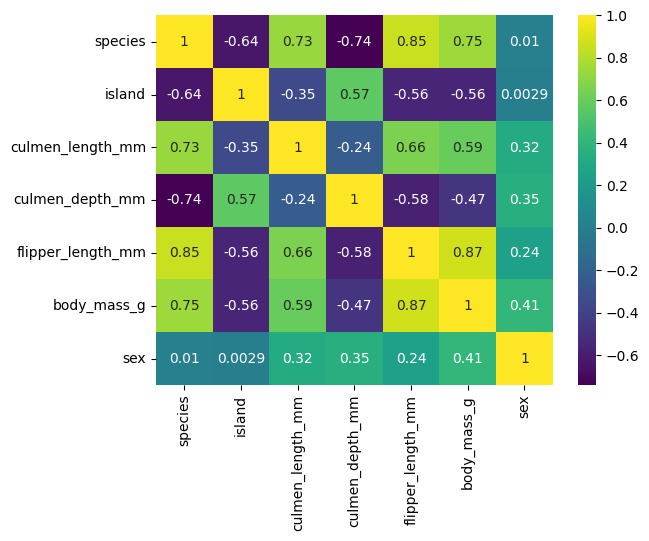

In [135]:
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

In [133]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

9. Split the data into dependent and independent variables.

In [136]:
X =df.drop(columns =['species'],axis =1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [137]:
y = df['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

10. Scaling the data

In [138]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [139]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


11. Split the data into training and testing

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10,stratify=y)

12.check the training and testing data shape.

In [145]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (240, 6)
X_test shape (104, 6)
y_train shape (240,)
y_test shape (104,)


In [150]:
y_train.value_counts()

0    106
2     87
1     47
Name: species, dtype: int64

In [151]:
y_test.value_counts()

0    46
2    37
1    21
Name: species, dtype: int64